In [19]:
"""read file test"""
import pandas as pd
import os
import cv2
import numpy as np
test = pd.read_csv(r"..\data\test\GTSRB\GT-final_test.csv", sep=';')

# Load test dataset
X_test = []
y_test = []
i = 0
print(list(test))
# print(list(test['Filename']))
# print(list(test['ClassId']))

for file_name,roi_x1,roi_y1,roi_x2,roi_y2,class_id in zip(list(test['Filename']),
                                                          list(test['Roi.X1']),
                                                          list(test['Roi.Y1']),
                                                          list(test['Roi.X2']),
                                                          list(test['Roi.Y2']),
                                                          list(test['ClassId']) ):
    img_path = os.path.join(r'..\data\test\GTSRB', file_name)
#     print(img_path)
    img = cv2.imread(img_path)
    img = img[roi_y1:roi_y2,roi_x1:roi_x2,:]
    img = cv2.resize(img,(32,32))
    red_channel =img[:,:,0]
    green_channel = img[:,:,1]
    blue_channel = img[:,:,2]

    #convert image to gray by red, greeen, blue channel
    gray_img = 0.2989 * red_channel + 0.5870 * green_channel + 0.1140 * blue_channel

    if (np.max(gray_img)>1):
        gray_img = gray_img/255.
  
    X_test.append(gray_img)
    y_test.append(class_id)

X_test = np.array(X_test)
X_test=X_test.reshape(X_test.shape +(1,))
y_test = np.array(y_test)
print(y_test.shape)
print(X_test.shape)


['Filename', 'Width', 'Height', 'Roi.X1', 'Roi.Y1', 'Roi.X2', 'Roi.Y2', 'ClassId']
(12630,)
(12630, 32, 32, 1)


(32, 32, 1)


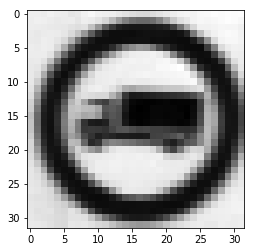

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
print(X_test[1].shape)
plt.imshow(X_test[0].reshape(32,32),cmap='gray')

In [21]:
import keras 
from keras.models import load_model
model = load_model('..\my_model.h5')
y_pred = model.predict_classes(X_test,batch_size=100)

In [25]:
print(y_pred)
acc = np.sum(y_pred == y_test) / np.size(y_pred)
print("Test accuracy = {}".format(acc))

[16  1 38 ...  6  7 10]
Test accuracy = 0.9817893903404592


(334, 500, 3)
(32, 32)
(32, 32, 1)
(1, 32, 32, 1)
[8]


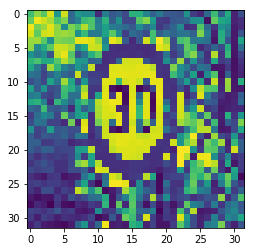

In [57]:
x=r"real_data_test\c30_2.jpg"


img =cv2.imread(x)
print(img.shape)
img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

img = cv2.resize(img,(32,32))
print(img.shape)
img=img/255.
plt.imshow(img)
img = img.reshape(img.shape +(1,))
print(img.shape)
img=img.reshape(-1,32,32,1)
print(img.shape)
y_pred =model.predict_classes(img)
print(y_pred)